In [1]:
GENENAME = 'AGO1'

In [2]:
%run '../ipython_startup.py'

Importing commonly used libraries: 
            os, sys 
            numpy as np 
            scipy as sp 
            pandas as pd 
            matplotlib as mp 
            matplotlib.pyplot as plt
            datetime as dt 
            mclib_Python/flagging as fg

Creating project level variables: 
        MCLAB = /home/jfear/mclab 
        PROJ = /home/jfear/mclab/cegs_ase_paper 
        TODAY = 20151115

Adding ['scripts/mclib_Python', 'scripts/ase_Python'] to PYTHONPATH



In [3]:
import gff as mcgff
import bam as mcbam
import numpy as np
from glob import glob
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Import GFF File and Get gene location
db = mcgff.FlyGff('/home/jfear/mclab/useful_dmel_data/flybase551/flybase_files/dmel-all-no-analysis-r5.51.gff')
gene = mcgff.FlyGene(GENENAME, db)

In [5]:
def get_pileup(fname, chrom, start, end):
    """ Function to pull out reads from BAM files. """
    bam = mcbam.Bam(fname)
    pileup = bam.get_pileup(chrom, start, end)
    return pd.Series(pileup)

In [20]:
# Get list of lines
with open('/home/jfear/lines.txt', 'r') as FH:
    lines = FH.read().rstrip('\n').split('\n')

# Iterate over lines
matrix = list()
for LINE in lines:    
    pileups = list()
    for FILE in glob('/home/jfear/cegs_oe/combined/{}_*.sorted.bam'.format(LINE)):
        pileups.append(get_pileup(FILE, gene.chrom, gene.start, gene.end))

    # Sum coverage
    matrix.append(pd.concat(pileups, axis=1).fillna(0).sum(axis=1))

In [25]:
df = pd.concat(matrix, axis=1).fillna(0)

In [28]:
df.columns = lines

KeyboardInterrupt: 

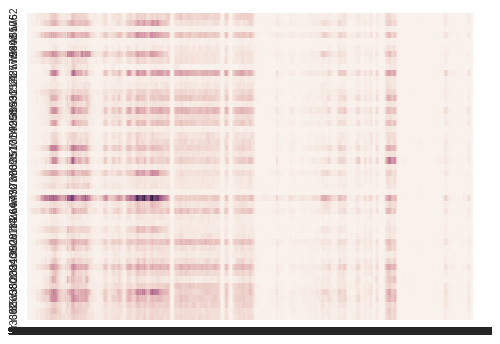

In [31]:
seaborn.heatmap(df.T)